# Importing the Libraries

In [61]:
import numpy as np      # for handling numbers
import matplotlib.pyplot as plt   # for data visualisation
import pandas as pd     # for handling dataset
from sklearn.model_selection import train_test_split    # to split the dataset into train and test
from sklearn.linear_model import LinearRegression   # to Linear Regression
from sklearn.metrics import r2_score    # to predict the test results
import statsmodels.api as sm    # for statsmodel summary

# Importing the dataset

In [62]:
data = pd.read_csv('avocado_linear.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_encoded
0,0,1451174400000000000,1.33,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0
1,1,1450569600000000000,1.35,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0
2,2,1449964800000000000,0.93,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0
3,3,1449360000000000000,1.08,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0
4,4,1448755200000000000,1.28,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0


Dropping the unnamed column

In [63]:
data=data.drop(data.columns[0],axis=1)
data.head()

,Date,AveragePrice,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_encoded
0,1451174400000000000,1.33,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0
1,1450569600000000000,1.35,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0
2,1449964800000000000,0.93,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0
3,1449360000000000000,1.08,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0
4,1448755200000000000,1.28,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0


# Fitting the Linear Model

**Splitting into train and test**

In [64]:
X = data.drop(columns=['AveragePrice'],axis=1)
Y = data['AveragePrice']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

**Training the train dataset**

In [65]:
linearRegressor = LinearRegression()
linearRegressor.fit(X_train,Y_train)

LinearRegression()

**Predicting the test results**

In [66]:
Y_pred = linearRegressor.predict(X_test)
r2 = r2_score(Y_test,Y_pred)

print("R2 Score: ",r2)

R2 Score:  0.2459069598481577


The linera model gives an R2 score of 0.2459 before removing the weakly correlated columns

# Correlation Matrix

In [67]:
correlation_mat = data.corr()

print(correlation_mat)

                  Date  AveragePrice      4046      4225      4770  \
Date          1.000000      0.123092 -0.111714 -0.088618 -0.124788   
AveragePrice  0.123092      1.000000 -0.384518 -0.265976 -0.304410   
4046         -0.111714     -0.384518  1.000000  0.337687  0.483007   
4225         -0.088618     -0.265976  0.337687  1.000000  0.429646   
4770         -0.124788     -0.304410  0.483007  0.429646  1.000000   
Total Bags    0.161817     -0.358109  0.558656  0.588486  0.368227   
Small Bags    0.145733     -0.314898  0.498349  0.599947  0.384229   
Large Bags    0.119049     -0.287150  0.426024  0.214777  0.106528   
XLarge Bags   0.068408     -0.171026  0.203831  0.216999  0.221484   
year          0.948763      0.076743 -0.105840 -0.083392 -0.118964   
type_encoded  0.061298      0.513083 -0.580583 -0.573006 -0.487353   

              Total Bags  Small Bags  Large Bags  XLarge Bags      year  \
Date            0.161817    0.145733    0.119049     0.068408  0.948763   
AveragePr

The correlation matrix tells whether any two attributes are positively correlated or negatively correlated and the strength between them

# Splitting the columns into positively correlated and negatively correlated

In [68]:
pos={}
neg={}
print(X.columns)
for i in X.columns:
  corr=data[i].corr(data['AveragePrice'])
  if(corr>0.0):
    pos[i]=corr
  else:
    neg[i]=corr
  print(f"Correlation between {i} and AveragePrice : {corr}")

Index(['Date', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'year', 'type_encoded'],
      dtype='object')
Correlation between Date and AveragePrice : 0.1230915861157374
Correlation between 4046 and AveragePrice : -0.38451814635404696
Correlation between 4225 and AveragePrice : -0.2659758732577281
Correlation between 4770 and AveragePrice : -0.30440978185360323
Correlation between Total Bags and AveragePrice : -0.3581086768729849
Correlation between Small Bags and AveragePrice : -0.31489842544568525
Correlation between Large Bags and AveragePrice : -0.2871497688559318
Correlation between XLarge Bags and AveragePrice : -0.1710257674670405
Correlation between year and AveragePrice : 0.07674336231477327
Correlation between type_encoded and AveragePrice : 0.513082789599091


In [69]:
print("Positively Correlated Attributes: ", pos)
print("Negatively Correlated Attributes: ",neg)

Positively Correlated Attributes:  {'Date': 0.1230915861157374, 'year': 0.07674336231477327, 'type_encoded': 0.513082789599091}
Negatively Correlated Attributes:  {'4046': -0.38451814635404696, '4225': -0.2659758732577281, '4770': -0.30440978185360323, 'Total Bags': -0.3581086768729849, 'Small Bags': -0.31489842544568525, 'Large Bags': -0.2871497688559318, 'XLarge Bags': -0.1710257674670405}


Thus the positively and negatively correlated attributes has been split

# Scatter plot for each independent variable against dependent variable

**Scatter plot for positively correlated attribues**

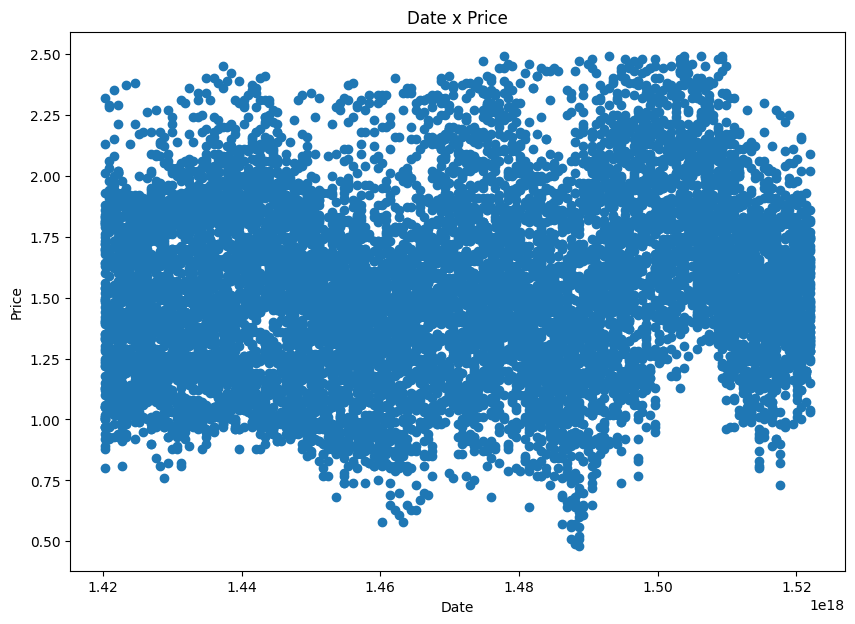

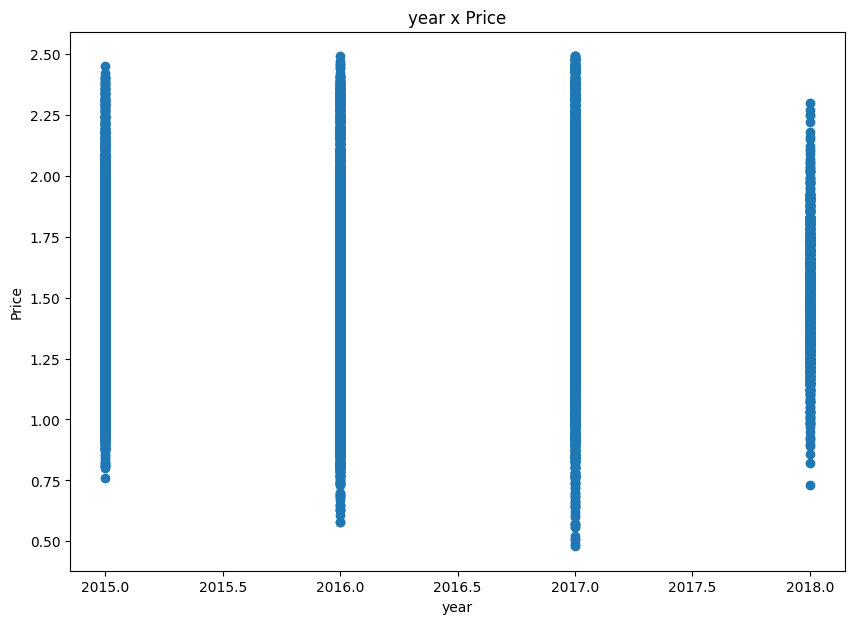

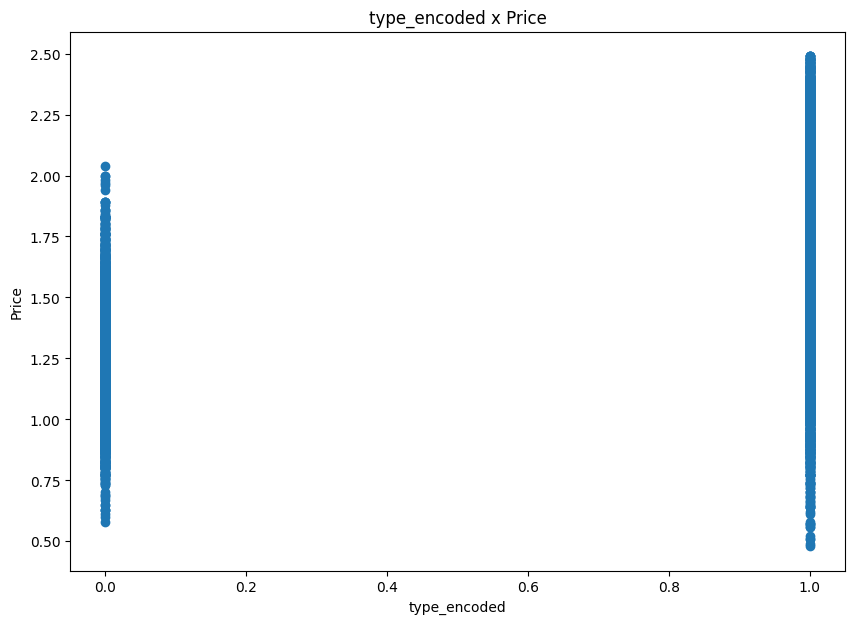

In [70]:
for column in pos:
  plt.figure(figsize=(10,7))
  plt.scatter(data[column],data['AveragePrice'])
  plt.xlabel(f'{column}')
  plt.ylabel('Price')
  plt.title(f'{column} x Price')
  plt.show()

The graph doesnt show clear inference. But when the price increses the values positively correlated attributes also increases.

**Scatter Plot for negatively correlated attributes**

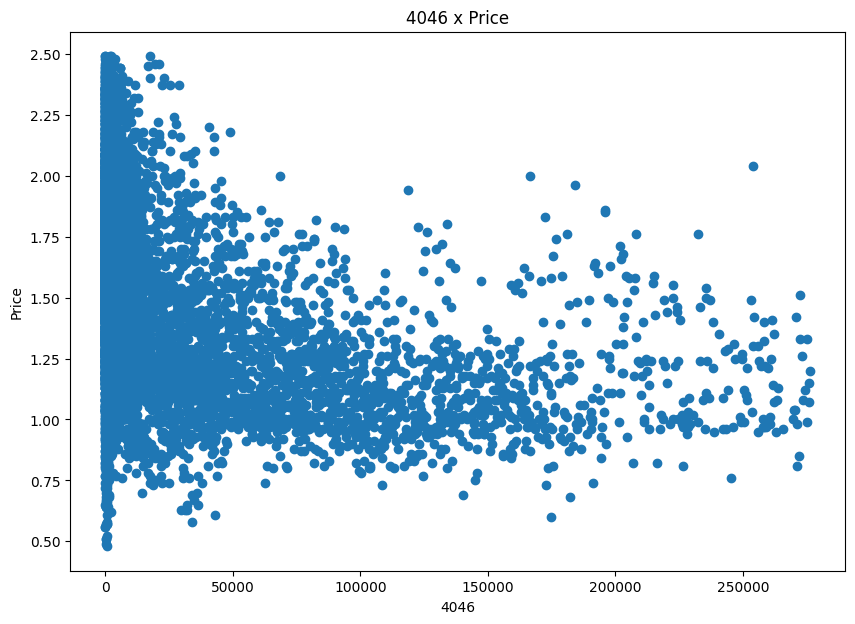

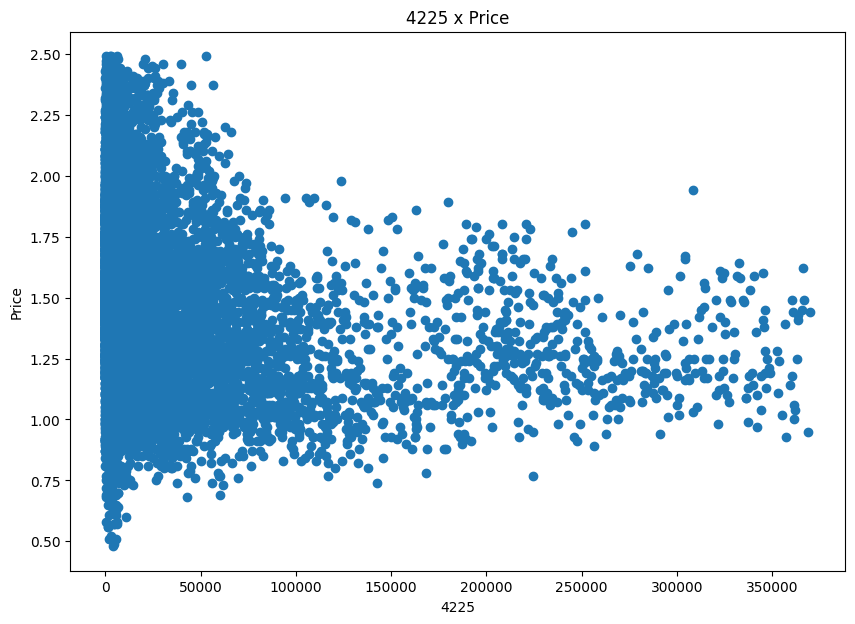

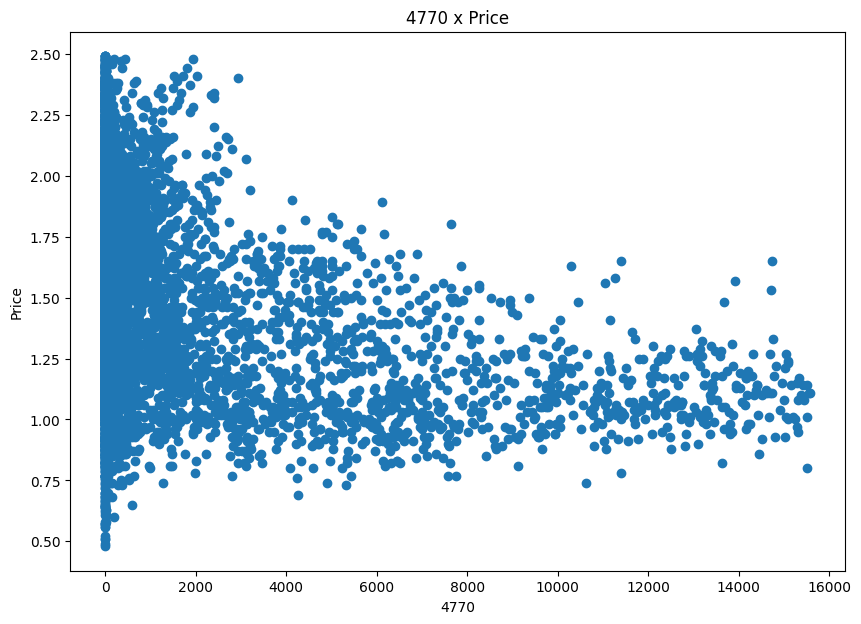

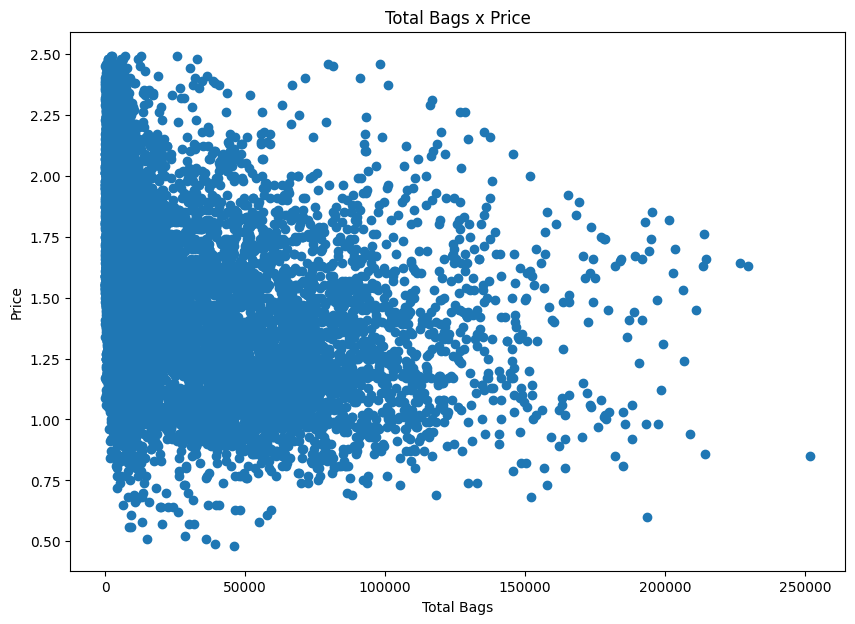

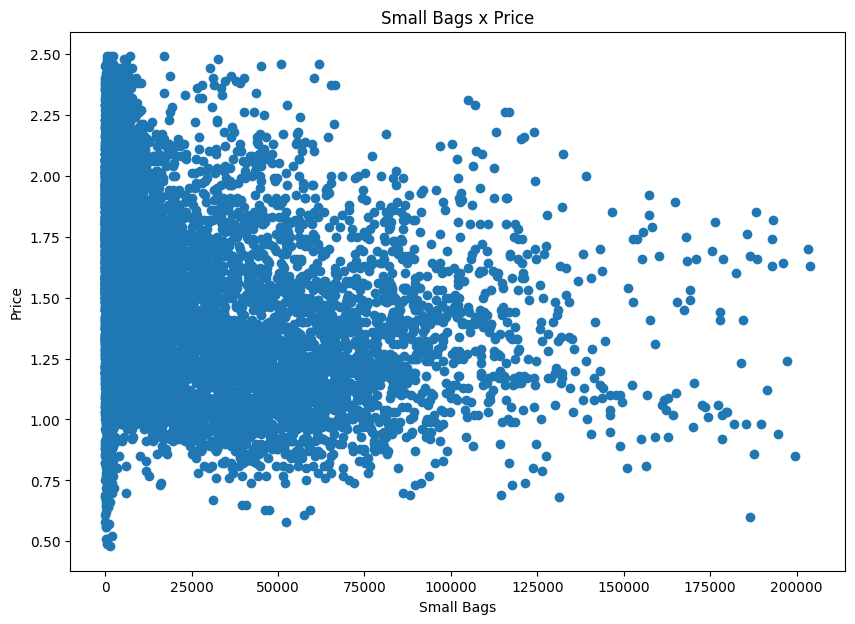

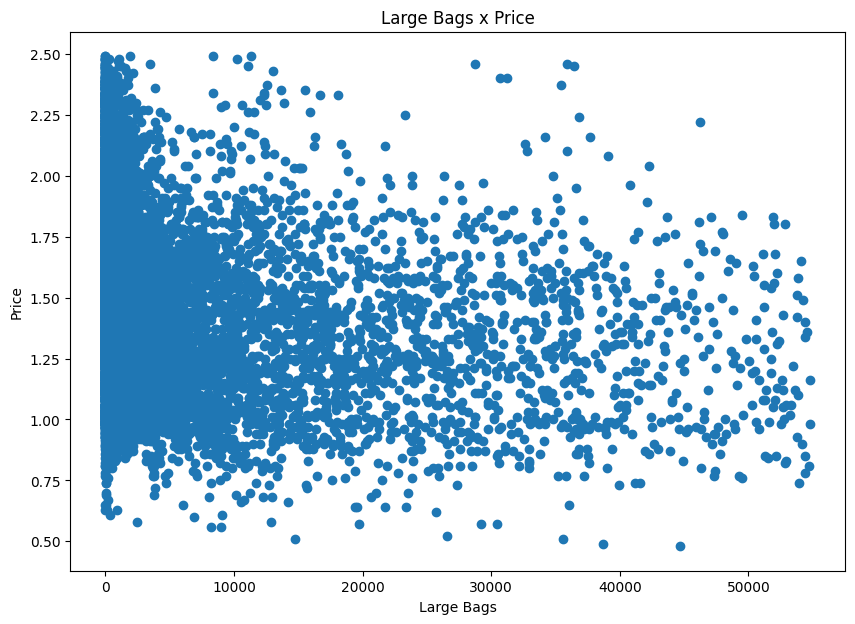

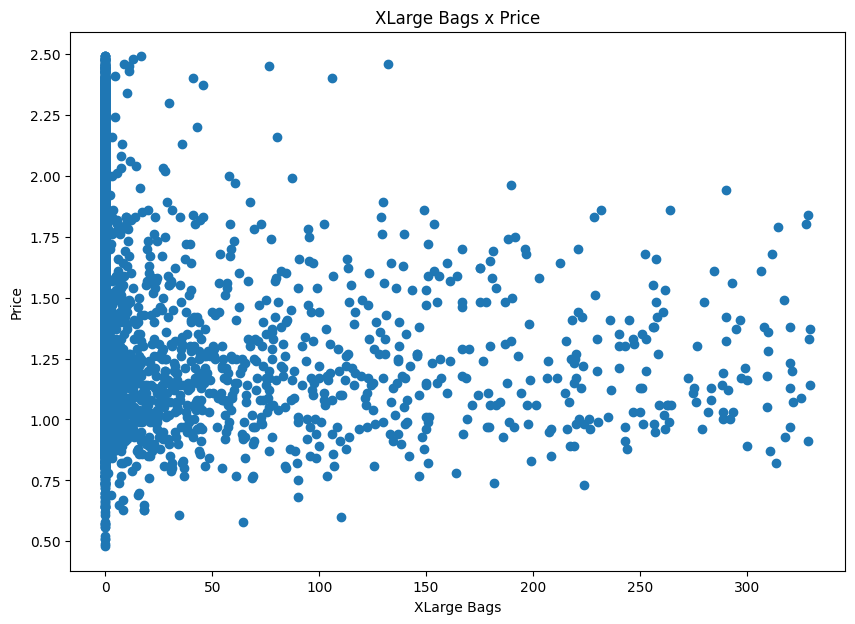

In [71]:
for column in neg:
  plt.figure(figsize=(10,7))
  plt.scatter(data[column],data['AveragePrice'])
  plt.xlabel(f'{column}')
  plt.ylabel('Price')
  plt.title(f'{column} x Price')
  plt.show()

From the graph we can easily infer that, when the price increases, the values of other attributes deacreases

# Assessing the strength of the relationship between independent and dependent variables

In [72]:
for column in data.columns:
  if(column=='AveragePrice'):
    continue
  x = sm.add_constant(data[column])
  y = data['AveragePrice']
  model = sm.OLS(y,x).fit()

  print("Statsmodel summary for",column)
  print(model.summary())

Statsmodel summary for Date
                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 16 Mar 2024   Prob (F-statistic):                nan
Time:                        09:15:59   Log-Likelihood:                -4390.2
No. Observations:               11538   AIC:                             8782.
Df Residuals:                   11537   BIC:                             8790.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.086e-37   

**Dropping weakly correlated columns using mean value**

In [73]:
total_pos=sum(x for x in pos.values())
print(total_pos)
total_neg=sum(x for x in neg.values())
print(total_neg)

0.7129177380296017
-2.0860864401070205


In [74]:
pos_mean=total_pos/len(pos)
neg_mean=total_neg/len(neg)
columns_to_drop=[]
for x,y in pos.items():
  if(y<pos_mean):
    columns_to_drop.append(x)
for x,y in neg.items():
  if(y>neg_mean):
    columns_to_drop.append(x)
print(columns_to_drop)

['Date', 'year', '4225', 'Large Bags', 'XLarge Bags']


In [75]:
data=data.drop(columns=columns_to_drop,axis=1)
data.head()

,AveragePrice,4046,4770,Total Bags,Small Bags,type_encoded
0,1.33,1036.74,48.16,8696.87,8603.62,0
1,1.35,674.28,58.33,9505.56,9408.07,0
2,0.93,794.70,130.50,8145.35,8042.21,0
3,1.08,1132.00,72.58,5811.16,5677.40,0
4,1.28,941.48,75.78,6183.95,5986.26,0


# Fitting the linear model for selected columns

**Splitting into test and train**

In [76]:
X = data.drop(columns=['AveragePrice'],axis=1)
Y = data['AveragePrice']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

**Training the train dataset**

In [77]:
linearRegressor = LinearRegression()
linearRegressor.fit(X_train,Y_train)

LinearRegression()

**Predicting the test values**

In [78]:
Y_pred = linearRegressor.predict(X_test)
r2 = r2_score(Y_test,Y_pred)

print("R2 Score: ",r2)

R2 Score:  0.31963925953054007


# Inference

R-Squared (R²) is a statistical measure used to determine the proportion of variance in a dependent variable that can be predicted or explained by an independent variable.

In other words, R-Squared shows how well a regression model (independent variable) predicts the outcome of observed data (dependent variable).

After the weakly correlated attibutes had been dropped, the R2 score rises from 0.2459 to 0.3196. Thus the linear model provide better accuracy when it is trained highly correlated attributes